In [1]:
#pip install graphviz

In [2]:
#Import the Dependencies
from sklearn.pipeline import Pipeline
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import norm
import statistics
import pandas_profiling
import pandas_profiling as pf
from pandas_profiling import ProfileReport

/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_44322/1946508069.py:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
fp=pd.read_csv('StudentHigherStudies.csv')

In [4]:
fp.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification(grade)  Nationality  Mother's qualification  \
0                          122.0            1                      19   
1                          160.0            1                       1   
2                          122.0            1                      37   
3                          122.0            1                      38   
4                          100.0            1                      37   

   Father's qualification  ...  Curricular units 1st sem (credited).1  \
0                      12  ...                                      0   
1                       3  ...                                      0   
2                      37  ...                                      0   
3                      37  ...                                      0   
4                      38  ...                                      0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [5]:
fp.tail()

Marital status  Application mode  Application order  Course  \
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous qualification(grade)  Nationality  Mother's qualification  \
4419                          125.0            1                       1   
4420                          120.0          105                       1   
4421                          154.0            1                      37   
4422                          180.0            1                      37   
4423                          152.0           22                      38   

      Father's qualification  ...  Curricular units 1st sem (credited).1  \
4419                       1  ...                                      0   
4420                       1  ...                                      0   
4421                      37  ...                                      0   
4422                      37  ...                                      0   
4423                      37  ...                                      0   

      Curricular units 2nd sem (enrolled)  \
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
4419                                       8   
4420                                       6   
4421                                       9   
4422                                       6   
4423                                       6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
4419                                    5                         12.666667   
4420                                    2                         11.000000   
4421                                    1                         13.500000   
4422                                    5                         12.000000   
4423                                    6                         13.000000   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
4419                                               0               15.5   
4420                                               0               11.1   
4421                                               0               13.9   
4422                                               0                9.4   
4423                                               0               12.7   

      Inflation rate   GDP    Target  
4419             2.8 -4.06  Graduate  
4420             0.6  2.02   Dropout  
4421            -0.3  0.79   Dropout  
4422            -0.8 -3.12  Graduate  
4423             3.7 -1.70  Graduate  

[5 rows x 37 columns]

### A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

Dataset Characteristics
Tabular

Subject Area
Social Science

Associated Tasks
Classification

Feature Type
Real, Categorical, Integer

# Instances
4424

# Features
36

Dataset Information
For what purpose was the dataset created?

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 

The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. 

The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. 

Who funded the creation of the dataset?

This dataset is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal.

What do the instances in this dataset represent?

Each instance is a student

Are there recommended data splits?

The dataset was used, in our project, with a data split of 80% for training and 20% for test.

Was there any data preprocessing performed?

We performed a rigorous data preprocessing to handle data from anomalies, unexplainable outliers, and missing values.

Has Missing Values?

No

Introductory Paper
Early prediction of student's performance in higher education: a case study
By Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho. 2021

Published in Trends and Applications in Information Systems and Technologies

# Marital Status	Feature	Integer	Marital Status	1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated	

# Application mode	Feature	Integer		1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)

# Application order	Feature	Integer		Application order (between 0 - first choice; and 9 last choice)

# Course	Feature	Integer		33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)

# Daytime/evening attendance	Feature	Integer		1 – daytime 0 - evening		no
Previous qualification	Feature	Integer	Education Level	1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)

# Previous qualification (grade)	Feature	Continuous		Grade of previous qualification (between 0 and 200)		no
Nacionality	Feature	Integer	Nationality	1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian		no
Mother's qualification	Feature	Integer	Education Level	1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)		no
Father's qualification	Feature	Integer	Education Level	1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)		no
Mother's occupation	Feature	Integer	Occupation	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants		no
Father's occupation	Feature	Integer	Occupation	0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers		no
Admission grade	Feature	Continuous		Admission grade (between 0 and 200)		no
Displaced	Feature	Integer		1 – yes 0 – no		no
Educational special needs	Feature	Integer		1 – yes 0 – no		no
Debtor	Feature	Integer		1 – yes 0 – no		no
Tuition fees up to date	Feature	Integer		1 – yes 0 – no		no
Gender	Feature	Integer	Gender	1 – male 0 – female		no
Scholarship holder	Feature	Integer		1 – yes 0 – no		no
Age at enrollment	Feature	Integer	Age	Age of studend at enrollment		no
International	Feature	Integer		1 – yes 0 – no		no
Curricular units 1st sem (credited)	Feature	Integer		Number of curricular units credited in the 1st semester		no
Curricular units 1st sem (enrolled)	Feature	Integer		Number of curricular units enrolled in the 1st semester		no
Curricular units 1st sem (evaluations)	Feature	Integer		Number of evaluations to curricular units in the 1st semester		no
Curricular units 1st sem (approved)	Feature	Integer		Number of curricular units approved in the 1st semester		no


## Curricular units 1st sem (grade)	Feature	Integer		Grade average in the 1st semester (between 0 and 20)		no
Curricular units 1st sem (without evaluations)	Feature	Integer		Number of curricular units without evalutions in the 1st semester		no
Curricular units 2nd sem (credited)	Feature	Integer		Number of curricular units credited in the 2nd semester		no
Curricular units 2nd sem (enrolled)	Feature	Integer		Number of curricular units enrolled in the 2nd semester		no
Curricular units 2nd sem (evaluations)	Feature	Integer		Number of evaluations to curricular units in the 2nd semester		no
Curricular units 2nd sem (approved)	Feature	Integer		Number of curricular units approved in the 2nd semester		no
Curricular units 2nd sem (grade)	Feature	Integer		Grade average in the 2nd semester (between 0 and 20)		no
Curricular units 2nd sem (without evaluations)	Feature	Integer		Number of curricular units without evalutions in the 1st semester		no
Unemployment rate	Feature	Continuous		Unemployment rate (%)		no
Inflation rate	Feature	Continuous		Inflation rate (%)		no
GDP	Feature	Continuous		GDP		no
Target	Target	Categorical		Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course

In [6]:
fp.shape

(4424, 37)

In [7]:
fp.groupby('Marital status').count()

Application mode  Application order  Course  \
Marital status                                                
1                           3919               3919    3919   
2                            379                379     379   
3                              4                  4       4   
4                             91                 91      91   
5                             25                 25      25   
6                              6                  6       6   

                Daytime/evening attendance  Previous qualification  \
Marital status                                                       
1                                     3919                    3919   
2                                      379                     379   
3                                        4                       4   
4                                       91                      91   
5                                       25                      25   
6                                        6                       6   

                Previous qualification(grade)  Nationality  \
Marital status                                               
1                                        3919         3919   
2                                         379          379   
3                                           4            4   
4                                          91           91   
5                                          25           25   
6                                           6            6   

                Mother's qualification  Father's qualification  \
Marital status                                                   
1                                 3919                    3919   
2                                  379                     379   
3                                    4                       4   
4                                   91                      91   
5                                   25                      25   
6                                    6                       6   

                Mother's occuption  ...  \
Marital status                      ...   
1                             3919  ...   
2                              379  ...   
3                                4  ...   
4                               91  ...   
5                               25  ...   
6                                6  ...   

                Curricular units 1st sem (credited).1  \
Marital status                                          
1                                                3919   
2                                                 379   
3                                                   4   
4                                                  91   
5                                                  25   
6                                                   6   

                Curricular units 2nd sem (enrolled)  \
Marital status                                        
1                                              3919   
2                                               379   
3                                                 4   
4                                                91   
5                                                25   
6                                                 6   

                Curricular units 2nd sem (evaluations)  \
Marital status                                           
1                                                 3919   
2                                                  379   
3                                                    4   
4                                                   91   
5                                                   25   
6                                                    6   

                Curricular units 2nd sem (approved)  \
Marital status                                        
1                                              3919   
2                                               379

In [8]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification(grade)                   4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
fp['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
fp.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous qualification(grade)  Nationality  Mother's qualification  \
count                    4424.000000  4424.000000             4424.000000   
mean                      132.613314     1.873192               19.561935   
std                        13.188332     6.914514               15.603186   
min                        95.000000     1.000000                1.000000   
25%                       125.000000     1.000000                2.000000   
50%                       133.100000     1.000000               19.000000   
75%                       140.000000     1.000000               37.000000   
max                       190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4424.000000  ...   
mean                22.275316  ...   
std                 15.343108  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 1st sem (credited).1  \
count                            4424.000000   
mean                                0.541817   
std                                 1.918546   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.

In [11]:
fp.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification(grade)                     0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occuption                                0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [12]:
fp.duplicated().sum()

0

In [13]:
fp.drop_duplicates(inplace=True)

In [14]:
fp.duplicated().sum()

0

<Axes: xlabel='Marital status', ylabel='count'>

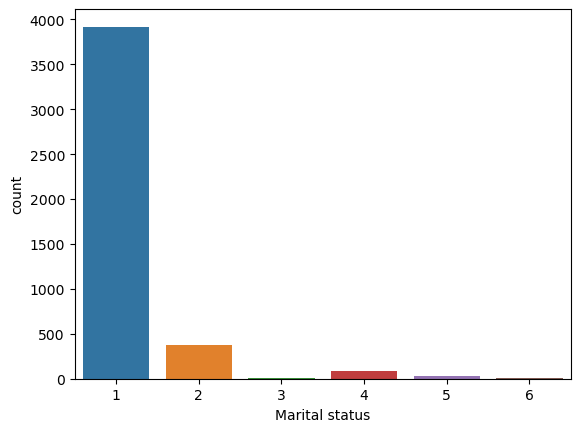

In [15]:
sns.countplot(x="Marital status",data=fp)

<Axes: xlabel='Target', ylabel='count'>

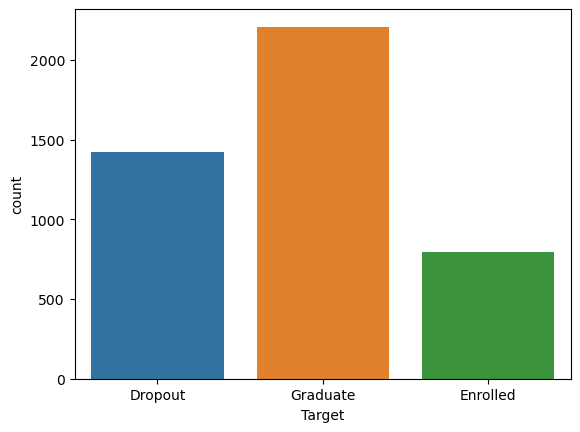

In [16]:
sns.countplot(x="Target",data=fp)

In [17]:
sns.pairplot(fp)

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [18]:
# plt.figure(figsize=(30,30))
# sns.heatmap(fp.corr(),cbar=True,square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The 

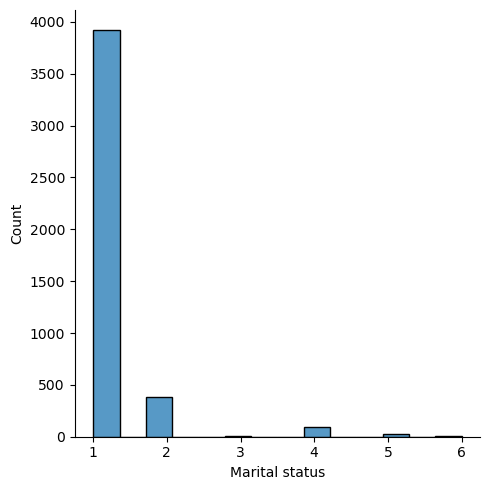

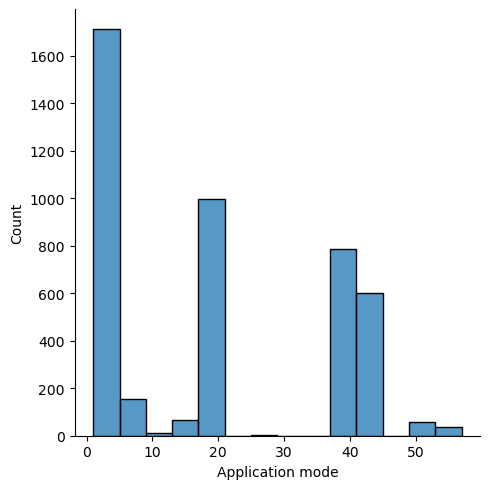

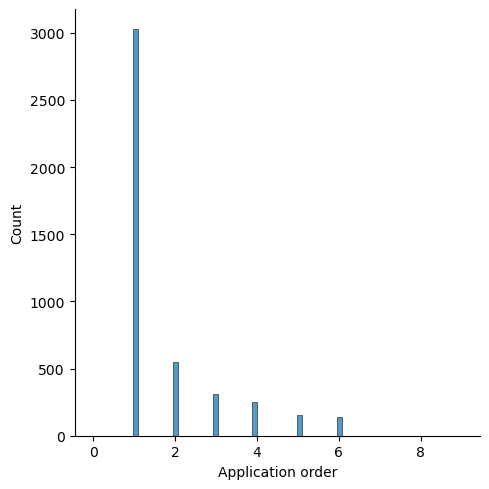

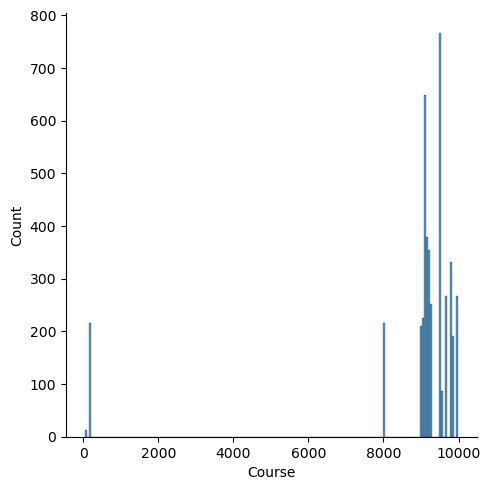

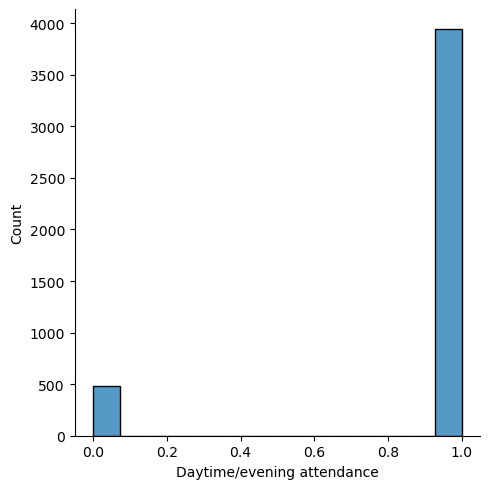

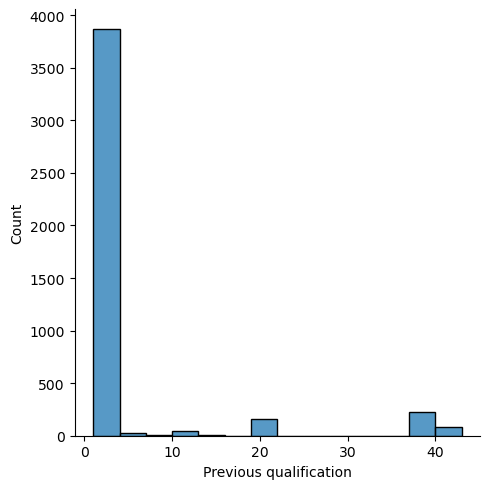

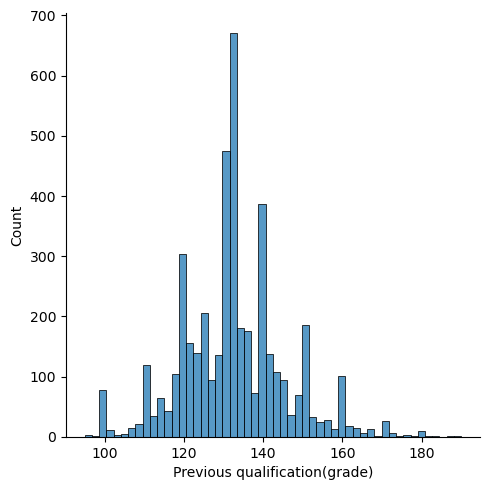

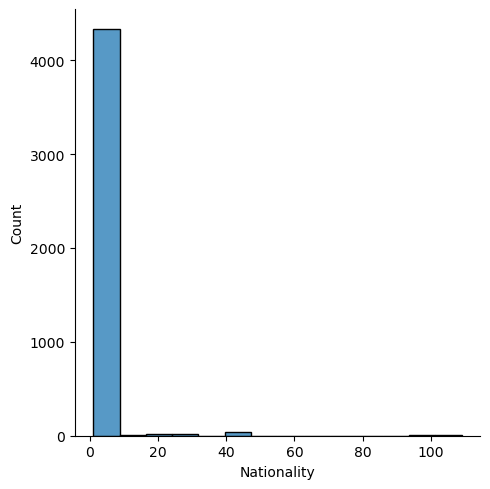

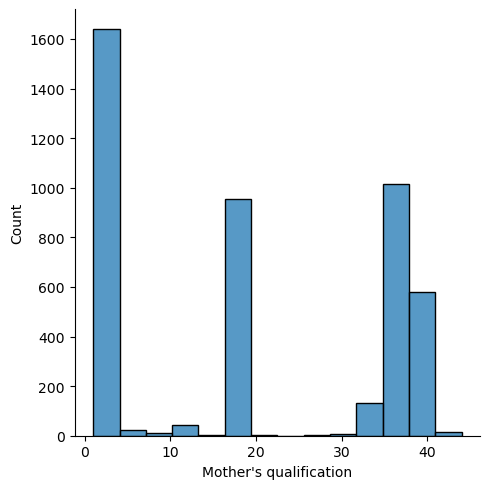

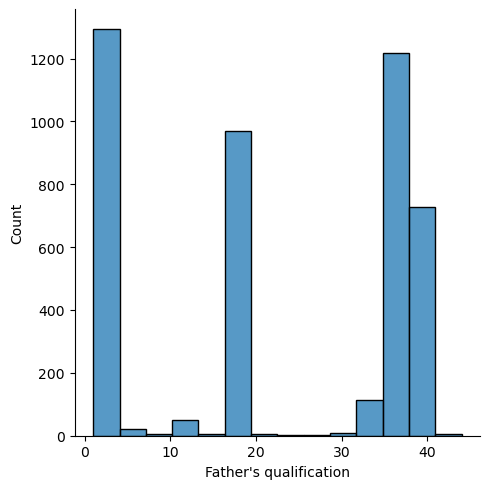

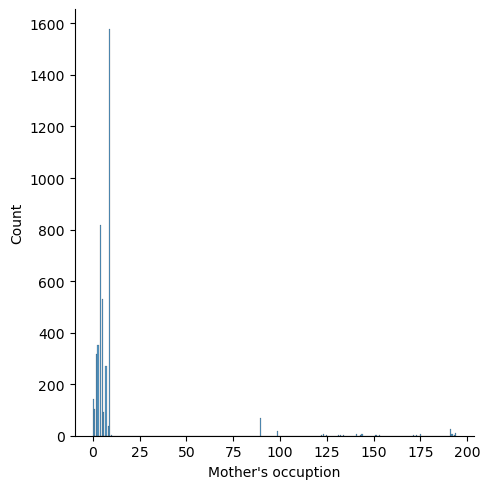

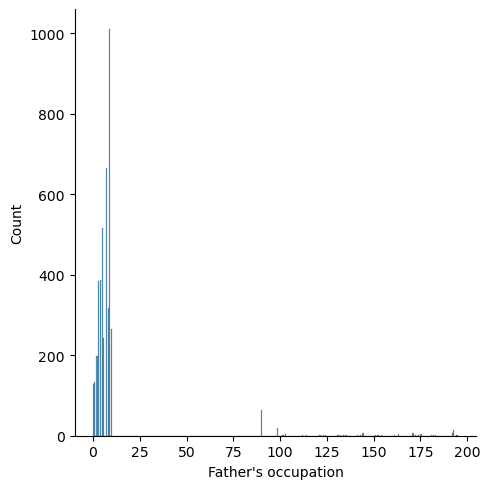

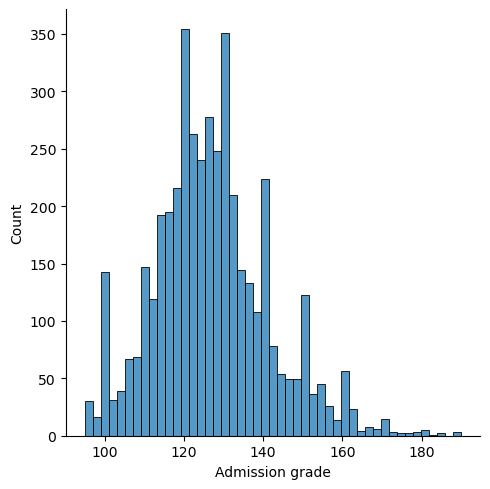

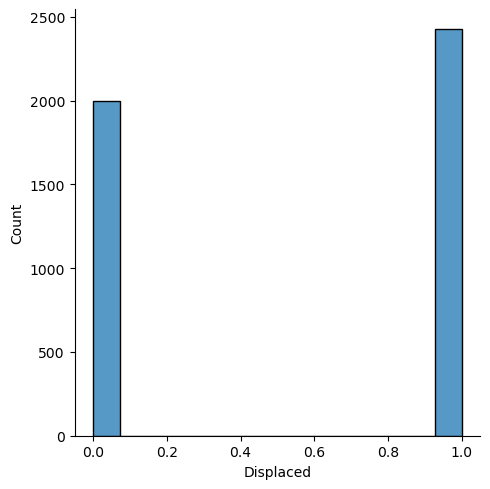

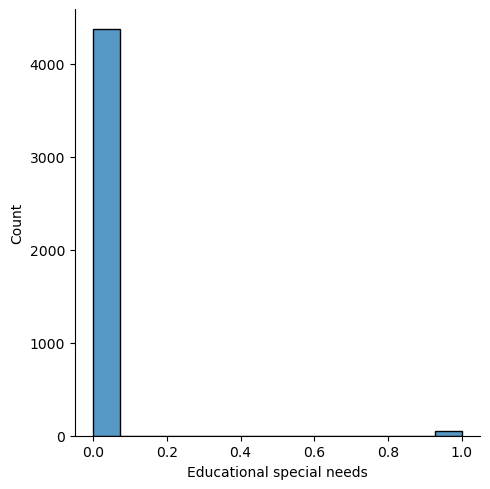

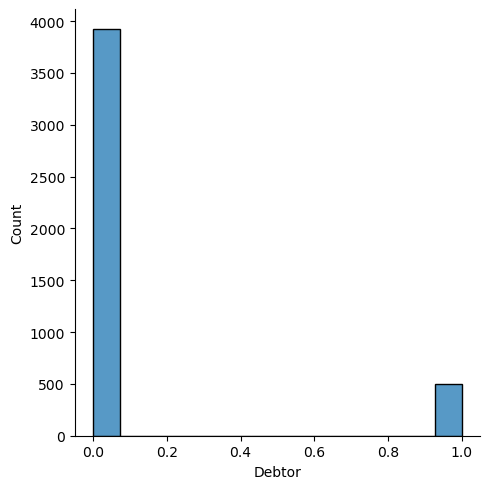

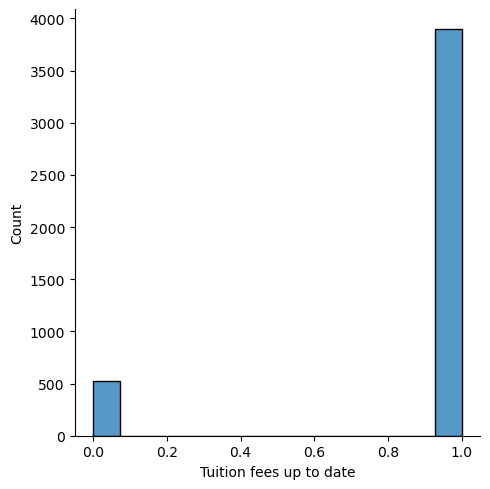

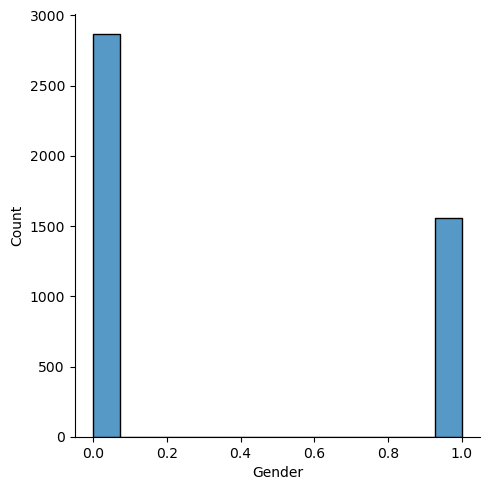

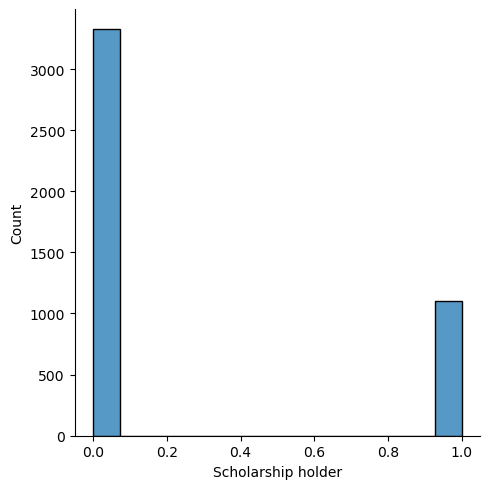

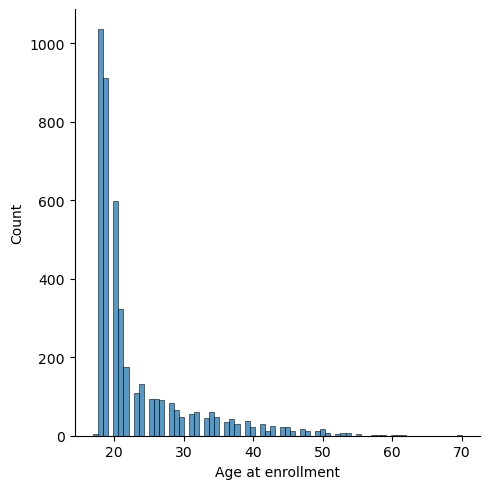

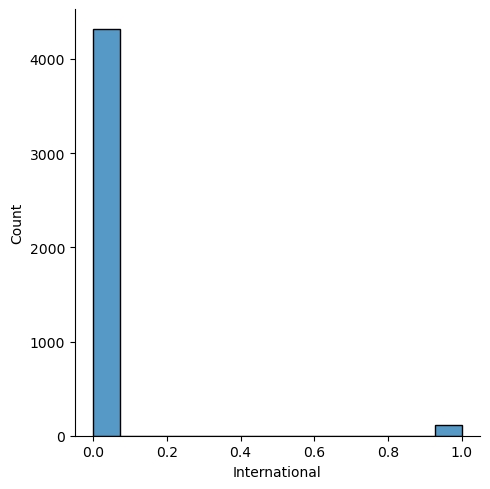

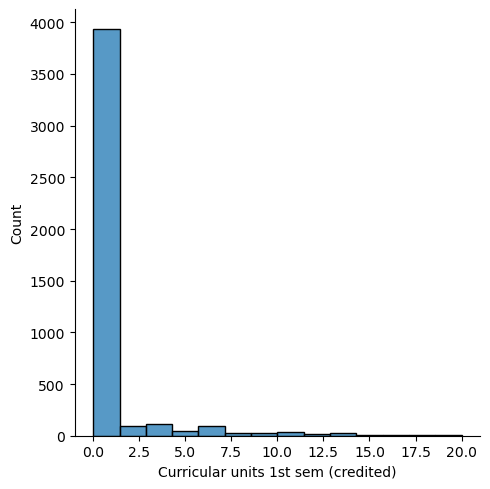

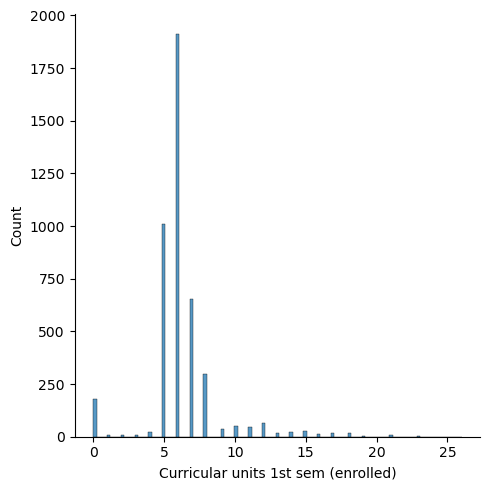

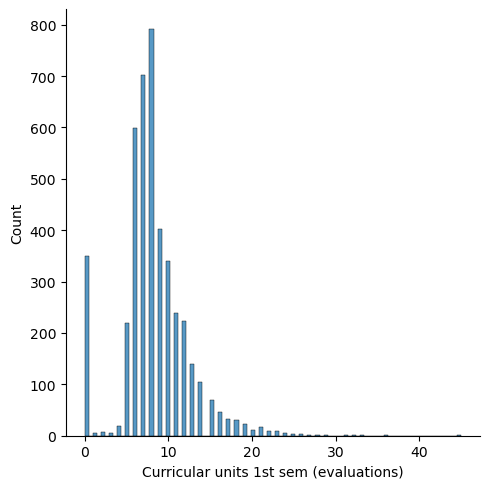

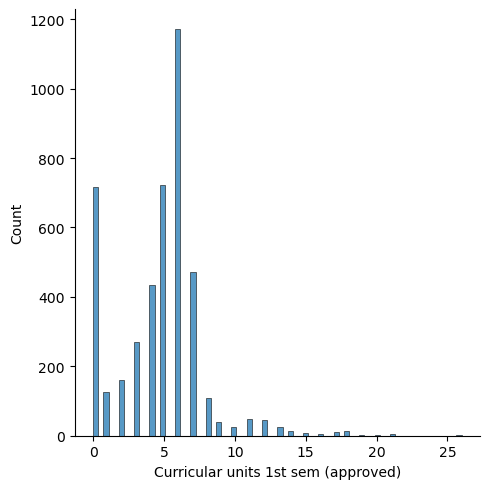

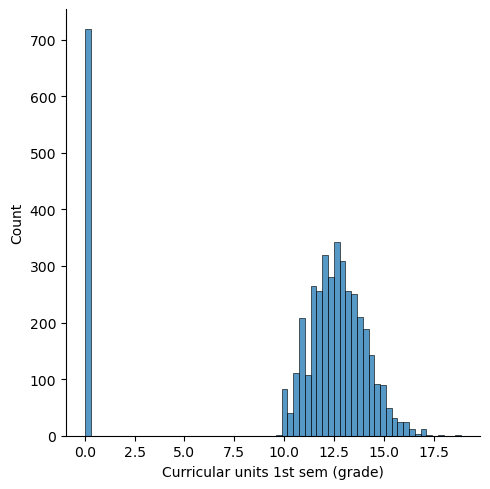

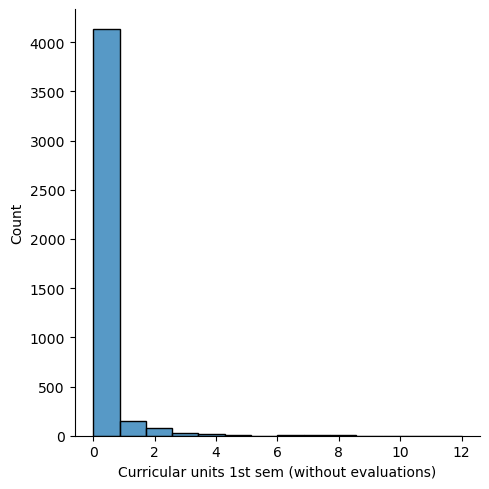

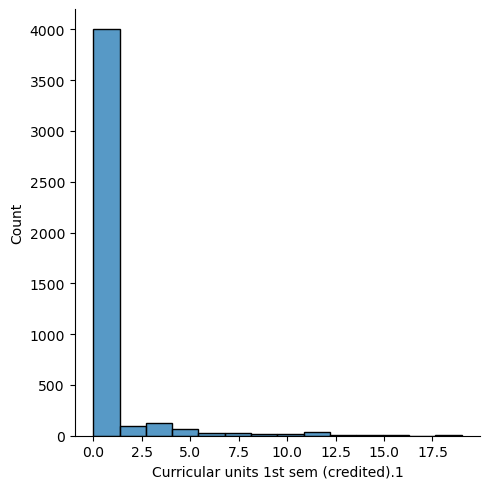

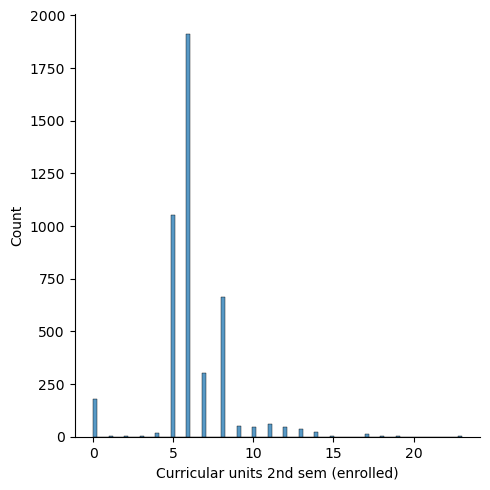

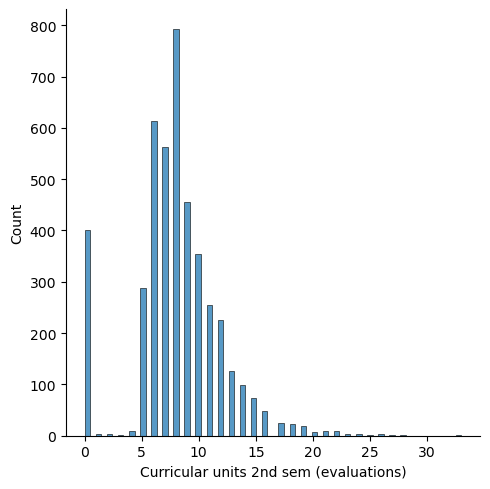

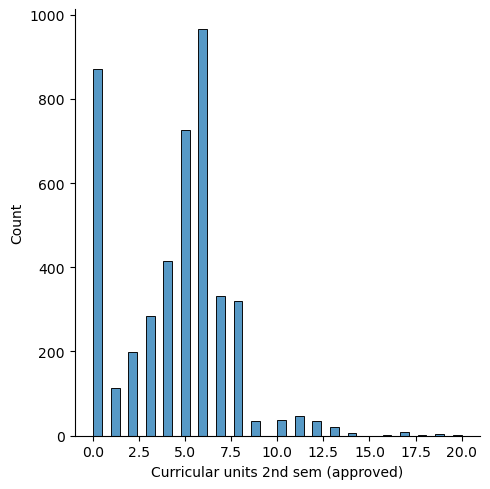

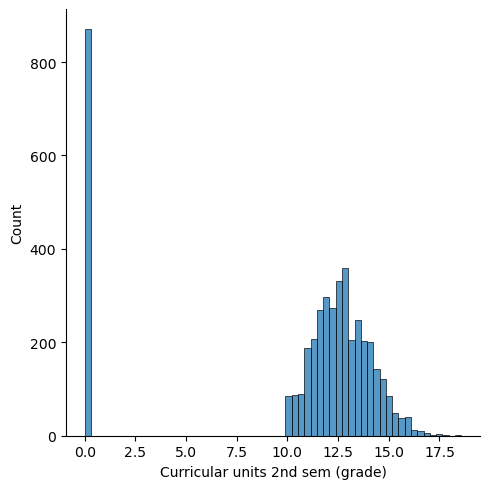

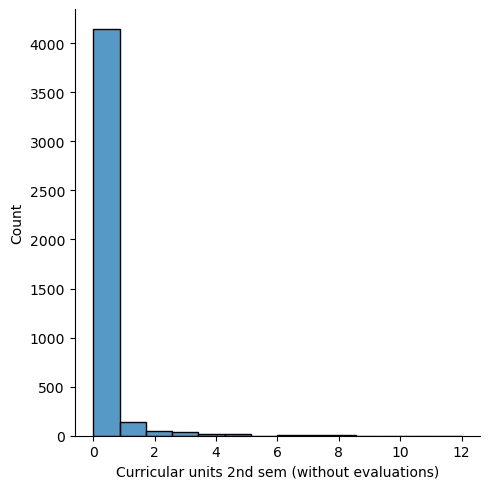

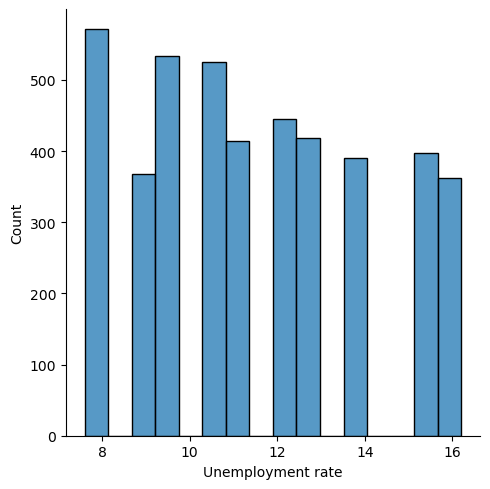

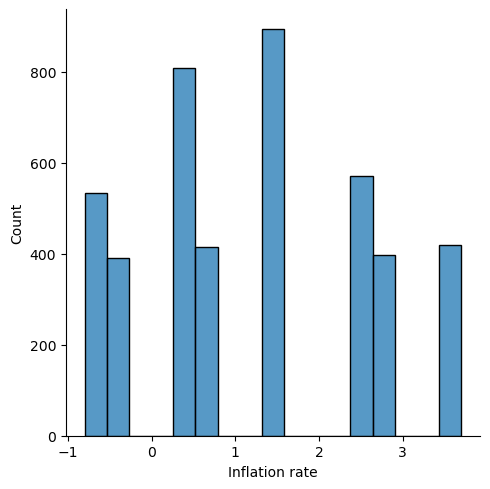

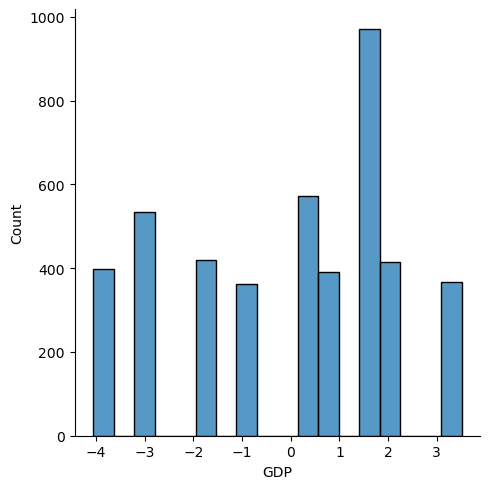

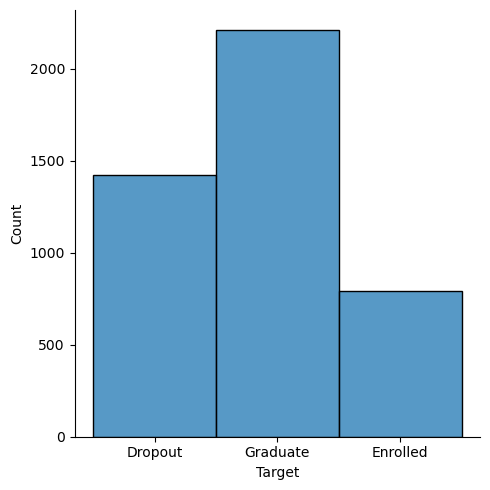

In [19]:
#creating for loop to get the distributon plot for all columns
for columns in fp:
    sns.displot(x=columns,data=fp)

In [20]:
fp['Marital status'].std()

0.6057469461306886

<Axes: xlabel='Target', ylabel='Marital status'>

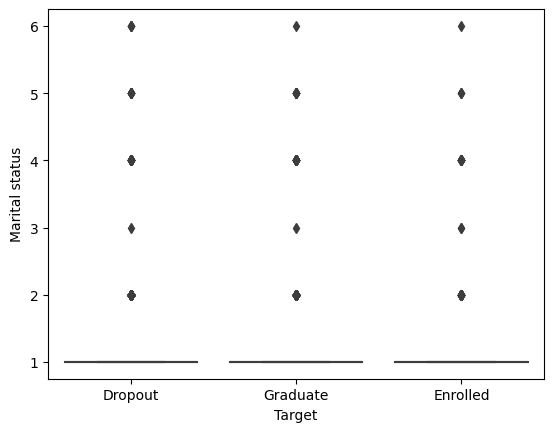

In [21]:
#or uuse sns for barplot
sns.boxplot(x='Target',y="Marital status",data=fp)

<Axes: xlabel='Target', ylabel='Marital status'>

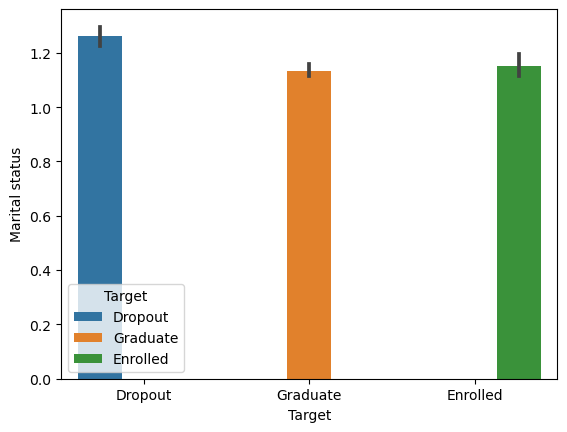

In [22]:
#or uuse sns for barplot
sns.barplot(x='Target',y="Marital status",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Debtor'>

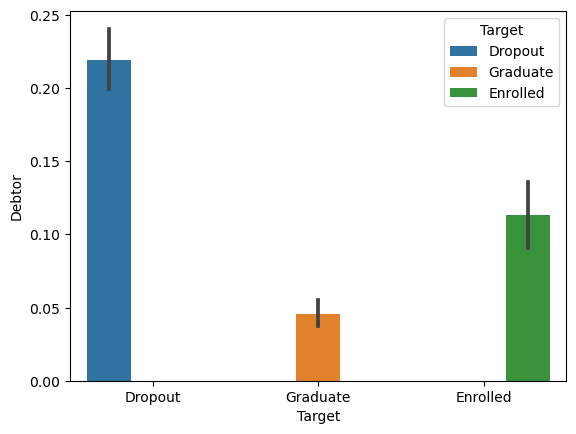

In [23]:
#or uuse sns for barplot
sns.barplot(x='Target',y="Debtor",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Course'>

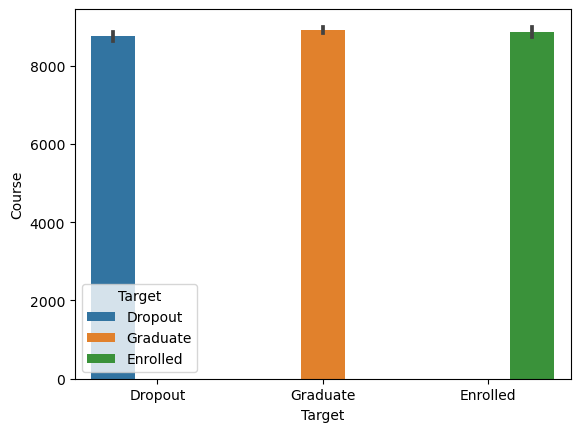

In [24]:
#or uuse sns for barplot
sns.barplot(x='Target',y="Course",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Inflation rate'>

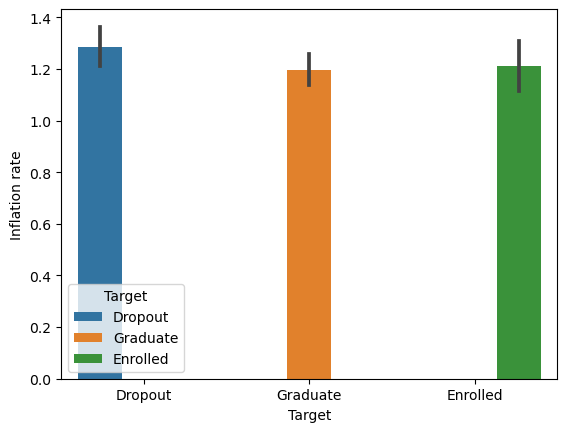

In [25]:
sns.barplot(x='Target',y="Inflation rate",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Unemployment rate'>

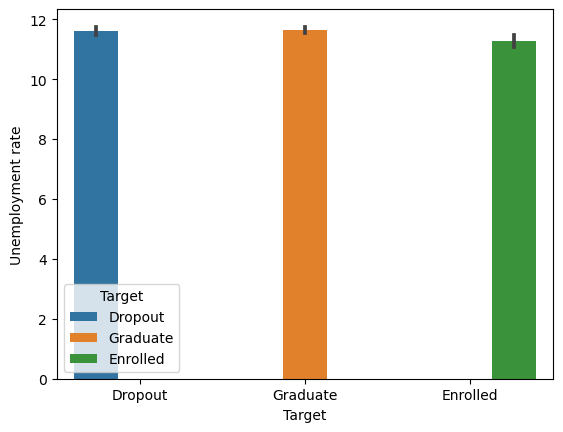

In [26]:
sns.barplot(x='Target',y="Unemployment rate",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Daytime/evening attendance'>

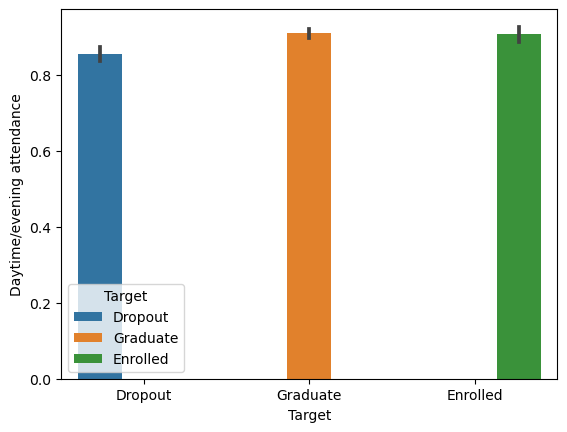

In [27]:
sns.barplot(x='Target',y="Daytime/evening attendance",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='Gender'>

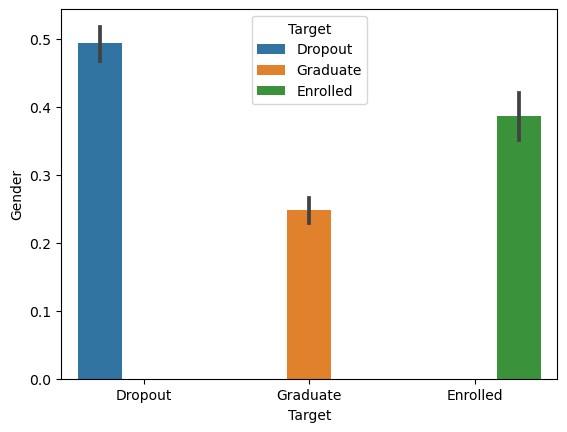

In [28]:
sns.barplot(x='Target',y="Gender",hue='Target',data=fp)

<Axes: xlabel='Target', ylabel='International'>

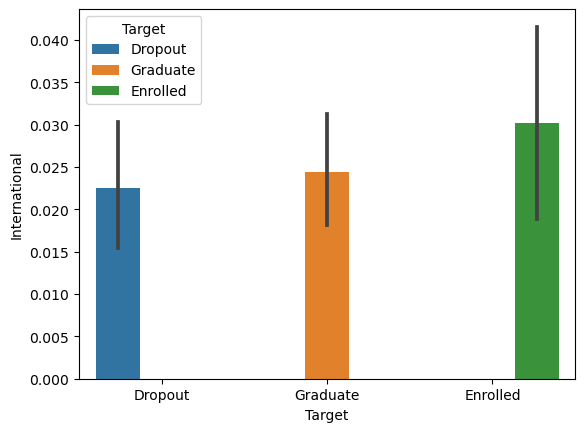

In [29]:
sns.barplot(x='Target',y="International",hue='Target',data=fp)

In [30]:
kk=pandas_profiling.ProfileReport(fp)

In [ ]:
kk

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
kk.to_file("Output.html")

In [ ]:
fp['Target'].value_counts()

In [ ]:
label_encode=LabelEncoder()
labels=label_encode.fit_transform(fp['Target'])
print(labels)
fp['Target']=labels
fp

# {0:Gradute,1:Enrolled,2:Dropout}

In [ ]:
fp.head(100)

In [ ]:
import imblearn

In [ ]:
X=fp.drop('Target',axis=1)

In [ ]:
X

In [ ]:
Y=fp['Target']

In [ ]:
Y

In [ ]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
y_resampled.value_counts()

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

# cross-Validation:it is a process in which we preserve some data for testing process


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.21,random_state=42,stratify=Y)

In [ ]:
X.shape,X_train.shape,X_test.shape

In [ ]:
Y.shape,Y_train.shape,Y_test.shape

## model Selection

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data  
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(Y_test, y_pred)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

In [ ]:
model=RandomForestClassifier()

In [ ]:
lps=model.fit(X_train,Y_train)

In [ ]:
X_train_prediction=lps.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy


In [ ]:
X_testing_prediction=lps.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)

In [ ]:
testing_accuracy


In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=lps.classes_, xticklabels=lps.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

# {0:Gradute,1:Enrolled,2:Dropout}

In [ ]:
# making a predictive System for testing the data 
# making a predictive System
input_data=X.iloc[175]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
#print(std_data)
std_data=Std.transform(std_data)
#print(std_data)
prediction=lps.predict(std_data)#model=RandomForest
print("target:",prediction)
if(prediction==0):
    print("Person is Graduate")
elif(prediction==1):
    print("Person is currently Enrolled in Courses")
elif(prediction==2):
    print("Person has not completed their education means he is Dropout")

In [ ]:
fp.head()

In [ ]:
Y.head(180)

In [ ]:
X.head()